# E.D.A Datasets 

En este jupyter notebook se va a realizar el E.D.A a los 5 Datasets proporcionados con el objetivo de comprender, analizar y limpiar su contenido pra posterioprmente realizar un entrenemaiento del modelo predictivo  

#### Importamos las librerias necesarias 

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math

Puede instalar las librerias ejecutando el siguiente comando en la terminal: pip install -r requirements.txt


#### Añadimos el directorio raiz al sys.path para facilitar importaciones 

In [5]:
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
os.chdir(root_dir)

print("Directorio de trabajo actual después del cambio:", os.getcwd())

Directorio de trabajo actual después del cambio: c:\Users\mirlo\workshop3


Si a este codigo lo ejecutas mas de una vez puede que empiese a pasear por tu directorio lo que puede generar errores en las importaiones, si te ocurre reinicia el Kernel y vuelvelo a ejecutar.

#### Cargamos los Datasets a Dataframes  

Dataset 2015

In [6]:
data_2015 = pd.read_csv(r'Data\2015.csv', delimiter=',')

Dataset 2016

In [7]:
data_2016 = pd.read_csv(r'Data\2016.csv', delimiter=',')

Dataset 2017 

In [8]:
data_2017 = pd.read_csv(r'Data\2017.csv', delimiter=',')

Dataset 2018

In [9]:
data_2018 = pd.read_csv(r'Data\2018.csv', delimiter=',')

Dataset 2019

In [10]:
data_2019 = pd.read_csv(r'Data\2019.csv', delimiter=',')

#### Miramos la informacion de los datasets 

Los archivos csv contienen informacion relacionadas con la felicidad o bienestar en varios países o regiones.

##### Dataset 2015

In [11]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Se puede ver que en el dataset hay 158 registros y tiene 12 columnas en total. 

Tiene 2 columnas de tipo object(lo que sugiere que contienen datos categóricos o cadenas de texto). Tiene 1 columna de tipo int64(Columnas de tipo numerico). Tiene 9 columnas de tipo float64(representa numeros con decimales).

**Descripcion Columnas:**

- **Country:** El nombre del país.
- **Region:** La región geográfica en la que se encuentra el país.
- **Happiness Rank:** La posición del país en el ranking de felicidad.
- **Happiness Score:** La puntuación de felicidad del país, que se suele medir en una escala.
- **Standard Error:** El error estándar de la puntuación de felicidad, que mide la variabilidad de la puntuación.
- **Economy (GDP per Capita):** La medida del PIB per cápita, que refleja la economía del país.
- **Family:** Un índice que representa la importancia de la familia en el bienestar del país.
- **Health (Life Expectancy):** Un índice relacionado con la esperanza de vida y la salud general de la población.
- **Freedom:** Un índice que refleja el nivel de libertad que disfrutan los ciudadanos del país.
- **Trust (Government Corruption):** Un índice que mide la confianza de la población en el gobierno y la percepción de corrupción.
- **Generosity:** Un índice que mide la generosidad de la población, como las donaciones y el voluntariado.
- **Dystopia Residual:** Un valor que representa el índice de "distopía" o la percepción de una sociedad ideal, que se utiliza como base para el cálculo de otros índices.

##### Dataset 2016

In [12]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

Se puede ver que en el dataset hay 157 registros y tiene 13 columnas en total. 

Tiene 2 columnas de tipo object(lo que sugiere que contienen datos categóricos o cadenas de texto). Tiene 1 columna de tipo int64(Columnas de tipo numerico). Tiene 10 columnas de tipo float64(representa numeros con decimales).

**Descripcion de Columnas:**

- **Country:** Nombre del país para el cual se están reportando los datos de felicidad.
- **Region:** La región geográfica a la que pertenece el país. En este caso, todos los países listados pertenecen a "Western Europe" (Europa Occidental).
- **Happiness Rank:** La clasificación del país en términos de felicidad, donde un número menor indica un nivel más alto de felicidad.
- **Happiness Score:** La puntuación de felicidad del país, que generalmente se mide en una escala de 0 a 10. Esta puntuación refleja el bienestar subjetivo de la población.
- **Lower Confidence Interval:** El límite inferior del intervalo de confianza para la puntuación de felicidad. Este intervalo indica el rango en el que es probable que se encuentre la verdadera puntuación de felicidad del país con un cierto nivel de confianza (generalmente 95%).
- **Upper Confidence Interval:** El límite superior del intervalo de confianza para la puntuación de felicidad. Al igual que el límite inferior, proporciona un rango para la puntuación de felicidad con un cierto nivel de confianza.
- **Economy (GDP per Capita):** Producto Interno Bruto (PIB) per cápita del país, que mide la riqueza económica promedio de los ciudadanos.
- **Family:** Una medida del apoyo familiar percibido por los individuos en el país. Este valor se basa en encuestas sobre el bienestar social.
- **Health (Life Expectancy):** La expectativa de vida en el país, que es un indicador importante de la salud general de la población.
- **Freedom:** Un índice que mide la libertad que sienten los ciudadanos en el país para hacer lo que quieran, incluyendo la libertad económica y política.
- **Trust (Government Corruption):** Una medida de la confianza de los ciudadanos en su gobierno, específicamente en relación con la corrupción. Este valor refleja el nivel de corrupción percibido en el país.
- **Generosity:** Un índice que mide la generosidad de la población, que puede incluir donaciones a organizaciones benéficas y otros actos de altruismo.
- **Dystopia Residual:** Este valor representa una puntuación teórica de "distopía" que sirve como referencia para comparar otros índices de felicidad. Se utiliza para ayudar a calibrar las puntuaciones de felicidad en relación con los peores escenarios posibles.

##### Dataset 2017

In [13]:
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

Se puede ver que en el dataset hay 155 registros y tiene 12 columnas en total. 

Tiene 1 columnas de tipo object(lo que sugiere que contienen datos categóricos o cadenas de texto). Tiene 1 columna de tipo int64(Columnas de tipo numerico). Tiene 10 columnas de tipo float64(representa numeros con decimales).

**Descripcion de Columnas**

- **Country:** Nombre del país.
- **Happiness.Rank:** Posición del país en el ranking de felicidad, donde un número más bajo indica una mayor felicidad.
- **Happiness.Score:** Puntuación de felicidad del país, en una escala de 0 a 10, donde valores más altos indican un mayor nivel de felicidad.
- **Whisker.high:** Valor máximo en el rango de confianza superior para la puntuación de felicidad.
- **Whisker.low:** Valor mínimo en el rango de confianza inferior para la puntuación de felicidad.
- **Economy..GDP.per.Capita.:** PIB per cápita del país, que refleja el nivel de desarrollo económico.
- **Family:** Valor que representa la calidad de las relaciones familiares y su impacto en la felicidad.
- **Health..Life.Expectancy.:** Esperanza de vida al nacer, un indicador de la salud general de la población.
- **Freedom:** Nivel de libertad percibido por los ciudadanos, que puede influir en la felicidad.
- **Generosity:** Medida de la generosidad de los ciudadanos, que se refleja en donaciones y actos de ayuda.
- **Trust..Government.Corruption.:** Nivel de confianza en el gobierno y la percepción de corrupción.
- **Dystopia.Residual:** Valor que representa una "residual" de distopía, que se utiliza como un punto de referencia para calcular la felicidad.

##### Dataset 2018

In [14]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Se puede ver que en el dataset hay 156 registros y tiene 9 columnas en total. 

Tiene 1 columnas de tipo object(lo que sugiere que contienen datos categóricos o cadenas de texto). Tiene 1 columna de tipo int64(Columnas de tipo numerico). Tiene 7 columnas de tipo float64(representa numeros con decimales).

**Descripcion de Columnas**

- **Overall rank:** Este es el rango global de cada país en la lista de felicidad, donde 1 indica el país más feliz.
- **Country or region:** El nombre del país o región evaluada.
- **Score:** La puntuación de felicidad de cada país en una escala que generalmente va de 0 a 10.
- **GDP per capita:** PIB per cápita, que es un indicador del nivel de desarrollo económico.
- **Social support:** Mide el nivel de apoyo social disponible para los ciudadanos.
- **Healthy life expectancy:** La expectativa de vida saludable, reflejando el bienestar físico y mental de la población.
- **Freedom to make life choices:** Mide la libertad que tienen los ciudadanos para tomar decisiones sobre sus vidas.
- **Generosity:** Representa el nivel de generosidad de la población, medido a través de donaciones y otras formas de ayuda.
- **Perceptions of corruption:** Medida de la percepción de corrupción en el gobierno y las instituciones del país.

##### Dataset 2019

In [15]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Se puede ver que en el dataset hay 156 registros y tiene 9 columnas en total. 

Tiene 1 columnas de tipo object(lo que sugiere que contienen datos categóricos o cadenas de texto). Tiene 1 columna de tipo int64(Columnas de tipo numerico). Tiene 7 columnas de tipo float64(representa numeros con decimales).

**Descripcion de Columnas**

- **Overall rank:** Clasificación general del país o región en términos de felicidad. Un número más bajo indica una mejor posición (por ejemplo, 1 es el país más feliz).
- **Country or region:** Nombre del país o la región analizada.
- **Score:** Puntaje de felicidad del país en una escala determinada (generalmente de 0 a 10).
- **GDP per capita:** Producto Interno Bruto (PIB) per cápita del país, que refleja el nivel de ingresos promedio por persona.
- **Social support:** Medida del apoyo social percibido en el país, que puede incluir factores como la red familiar y comunitaria.
- **Healthy life expectancy:** Expectativa de vida saludable, que considera los años que una persona puede esperar vivir sin enfermedades graves.
- **Freedom to make life choices:** Grado de libertad que tienen los individuos para tomar decisiones que afectan sus vidas.
- **Generosity:** Medida de la generosidad de las personas en el país, que puede incluir donaciones y actos altruistas.
- **Perceptions of corruption:** Evaluación de la corrupción en el gobierno y las instituciones del país.

#### Revisamos la presencia de valores nulos en los Datasets 


In [16]:
valores_nulos2015 = data_2015.isnull().sum()
valores_nulos2016 = data_2016.isnull().sum()
valores_nulos2017 = data_2017.isnull().sum()
valores_nulos2018 = data_2018.isnull().sum()
valores_nulos2019 = data_2019.isnull().sum()

In [17]:
print("Valores nulos en 2015:\n", valores_nulos2015)
print("Valores nulos en 2016:\n", valores_nulos2016)
print("Valores nulos en 2017:\n", valores_nulos2017)
print("Valores nulos en 2018:\n", valores_nulos2018)
print("Valores nulos en 2019:\n", valores_nulos2019)

Valores nulos en 2015:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
Valores nulos en 2016:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
Valores nulos en 2017:
 Country                    

Tenemos que en los Años 2015, 2016, y 2017: No hay valores nulos. Todos los datos son completos. Sin embargo en el año 2018: Hay 1 valor nulo en la columna "Perceptions of corruption" el cual vamos a remplazar por 0 

In [18]:
data_2018['Perceptions of corruption'] = data_2018['Perceptions of corruption'].fillna(0)

#### Revisamos la presencia de valores duplicados

In [19]:
duplicados_2015 = data_2015.duplicated().sum()
duplicados_2016 = data_2016.duplicated().sum()
duplicados_2017 = data_2017.duplicated().sum()
duplicados_2018 = data_2018.duplicated().sum()
duplicados_2019 = data_2019.duplicated().sum()

In [20]:
print(f"Valores duplicados en 2015: {duplicados_2015}")
print(f"Valores duplicados en 2016: {duplicados_2016}")
print(f"Valores duplicados en 2017: {duplicados_2017}")
print(f"Valores duplicados en 2018: {duplicados_2018}")
print(f"Valores duplicados en 2019: {duplicados_2019}")

Valores duplicados en 2015: 0
Valores duplicados en 2016: 0
Valores duplicados en 2017: 0
Valores duplicados en 2018: 0
Valores duplicados en 2019: 0


No se encontraron valores duplicados

#### Revisamos la presencia de Valores Atipicos 

Para esto vamos a hacer boxplots para ver el comportamiento de las variables numericas 

In [28]:
def plot_boxplots(data, year):
    num_cols = data.select_dtypes(include='number').shape[1]
    nrows = math.ceil(num_cols / 5)  
    ncols = min(5, num_cols) 

    data.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(nrows, ncols), figsize=(15, 8), sharex=False, sharey=False)
    plt.suptitle(f"Boxplots para {year}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.show()


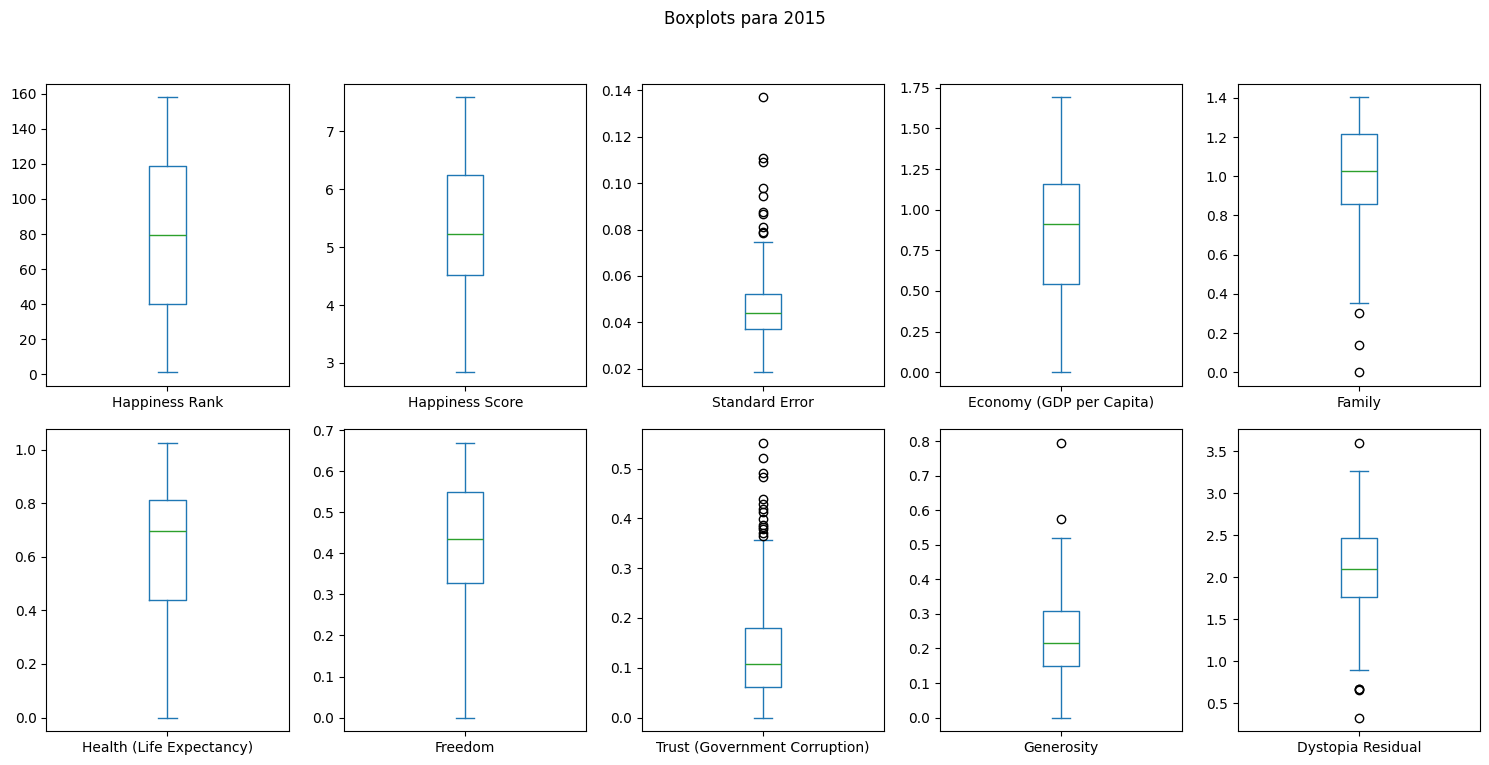

In [30]:
plot_boxplots(data_2015, "2015")

Tenemos que no hay presencia de valores atipicos en la mayoria de las variables Sin embargo, hay disparidades significativas en términos de confianza en el gobierno y generosidad. También se observan ciertos valores atípicos en varias pero reflejan las diferencias extremas entre países en estas dimensiones de felicidad lo que sera importante conservar en el analisis.

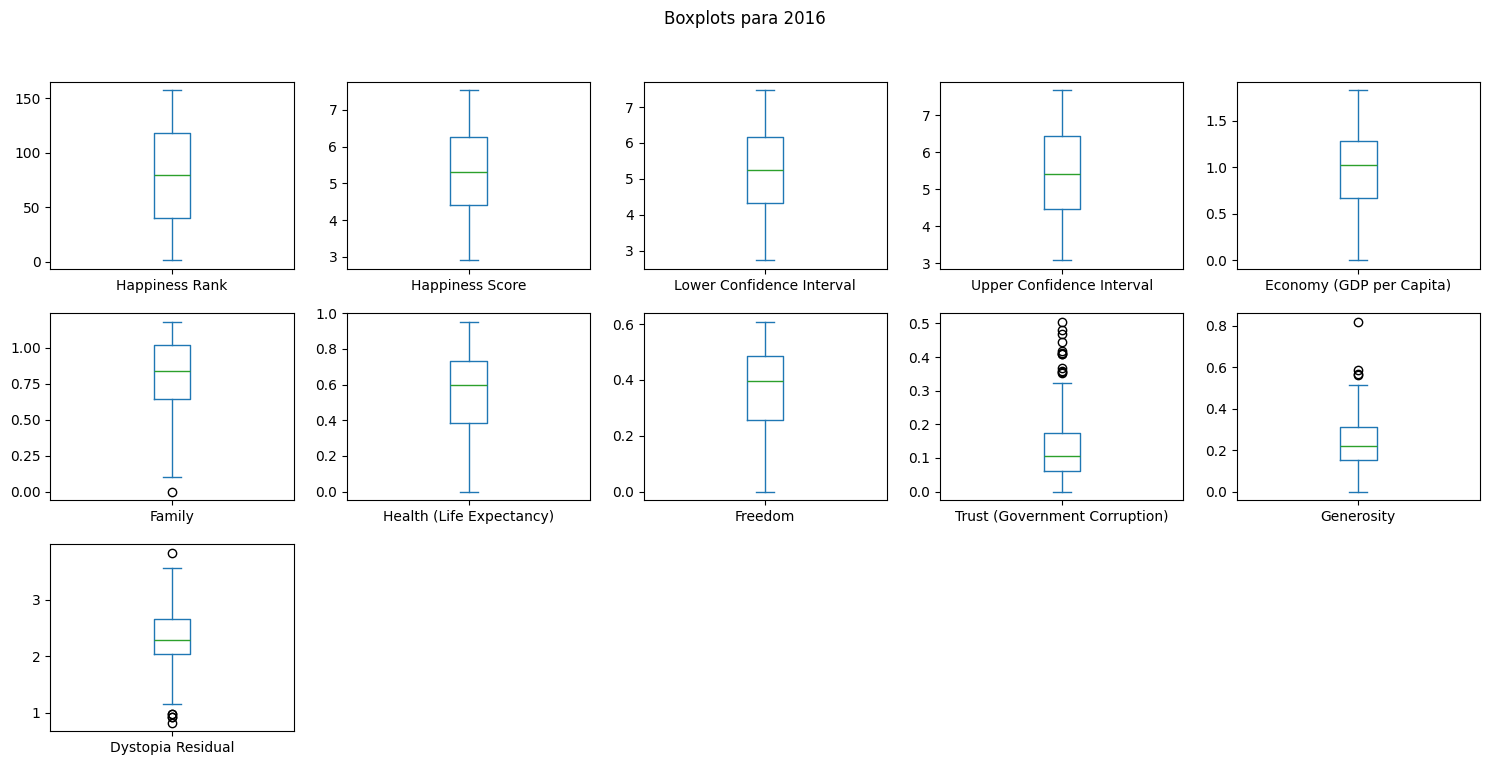

In [31]:
plot_boxplots(data_2016, "2016")

En estos boxplots al igual que en los del dataset del año 2015 no tenemos una gran cantidad de datos atipicos Las principales diferencias están especialmente en la variable de Trust (Government Corruption) y Generosity, que podrían estar influenciadas por cambios en políticas o eventos específicos de ciertos países en ese año.

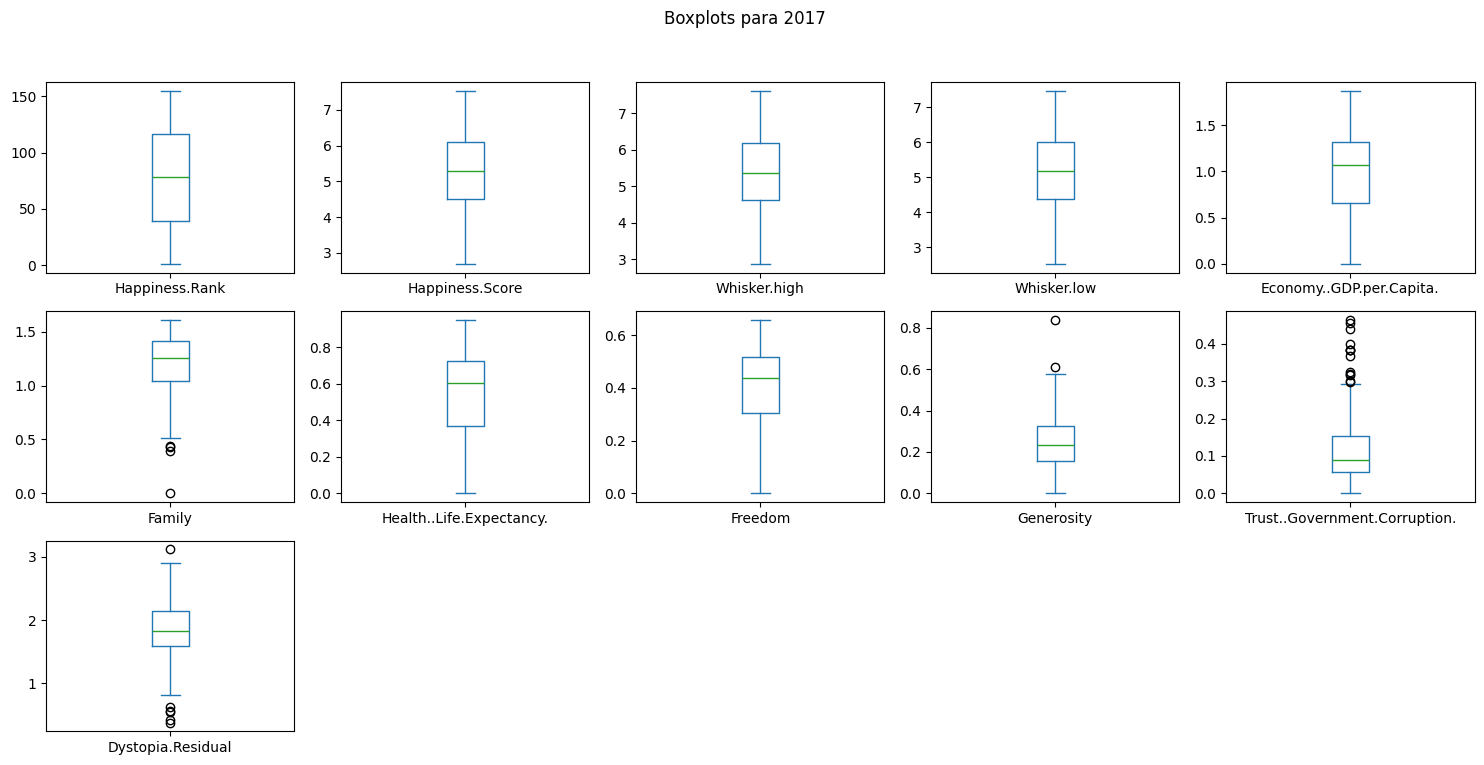

In [32]:
plot_boxplots(data_2017, "2017")

Los datos de 2017 son muy similares a los de 2015 y 2016, lo cual sugiere una estabilidad en los factores que influyen en la felicidad global. Las distribuciones y valores atípicos en variables como Trust (Government Corruption) y Generosity continúan mostrando las diferencias entre los países en cuanto a estos aspectos.

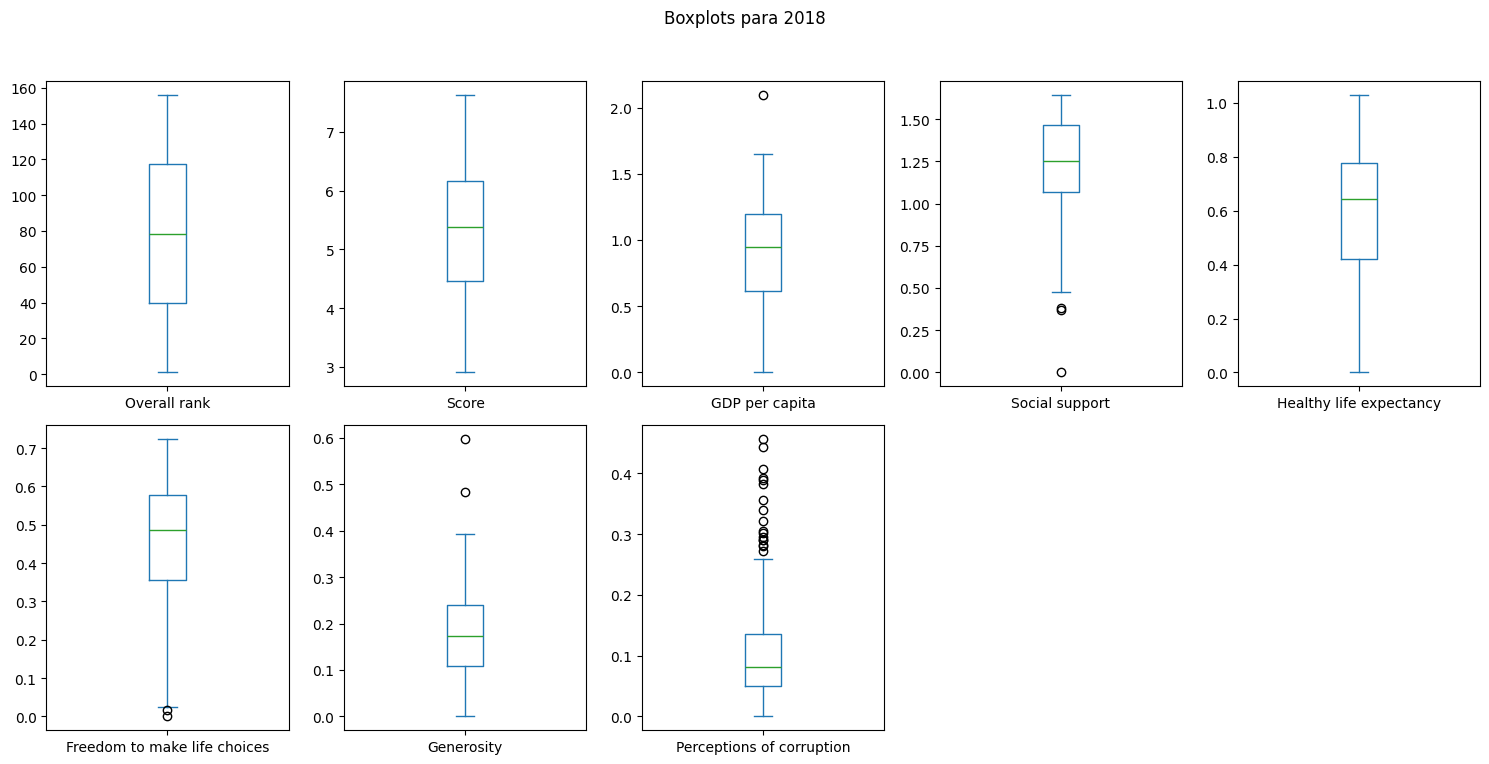

In [33]:
plot_boxplots(data_2018, "2018")

Los valores atípicos en métricas como "GDP per capita", "Generosity" y "Perceptions of Corruption" sugieren que en estas áreas específicas hay países que se comportan de manera significativamente diferente al resto, probablemente debido a contextos socioeconómicos o culturales particulares.

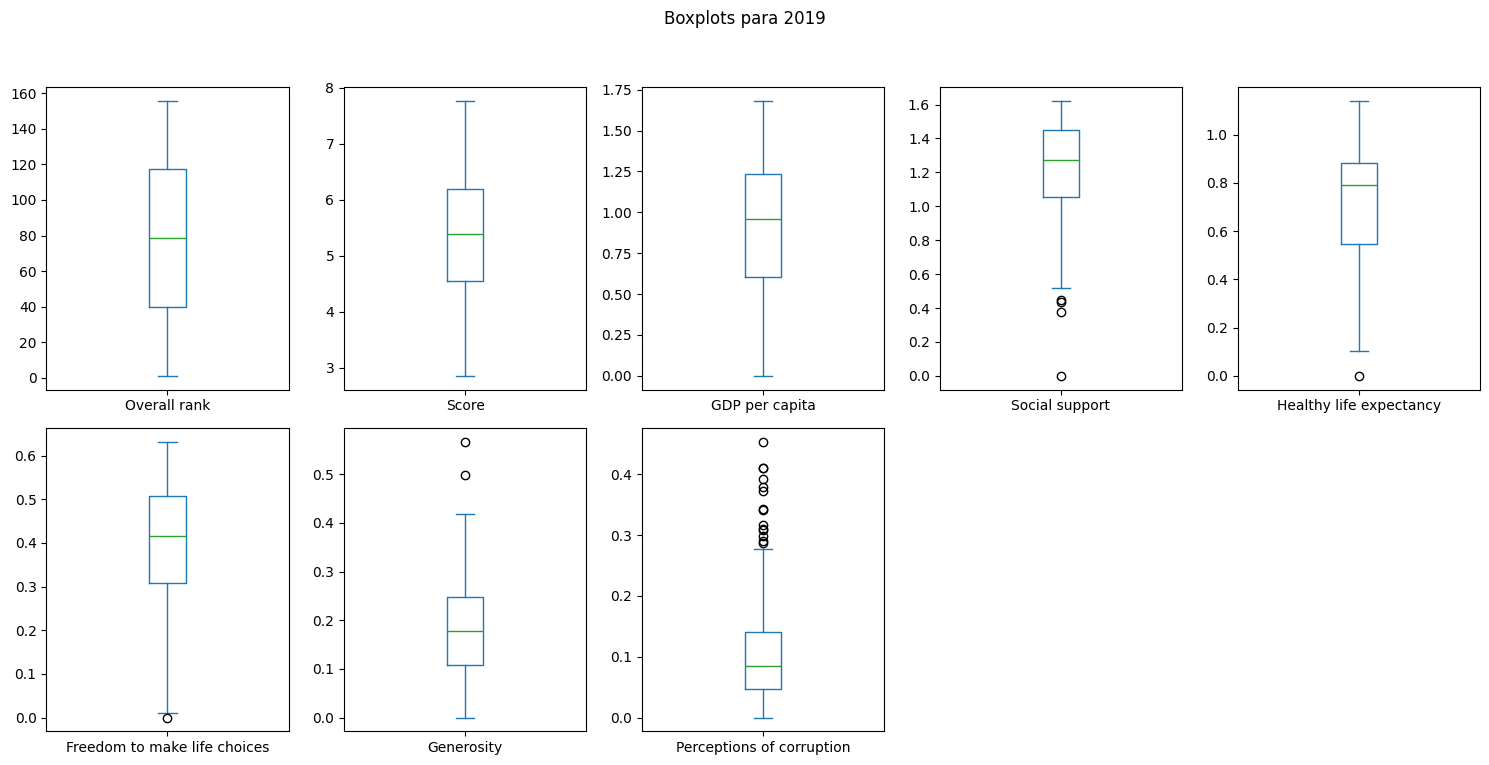

In [34]:
plot_boxplots(data_2019, "2019")

Algunas tendencias generales se mantienen: ciertas métricas como "Perceptions of Corruption" y "Social Support" presentan valores atípicos en los extremos. Esto podría indicar que, aunque en general hay una consistencia en la mayoría de los datos, algunos países tienen condiciones particulares que los diferencian significativamente en estas áreas.

#### Concatenamos los Datasets 

Para esto unificamos los nombres de columnas pues unos tienen nombres o formatos similares. 

Una vez se estandarizan los nombres concatenamos los datasets en un unico Dataframe 

In [36]:
data_2015 = data_2015.rename(columns={
    'Country': 'Country or region', 'Happiness Rank': 'Overall rank',
    'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'GDP per capita',
    'Family': 'Social support', 'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices', 'Trust (Government Corruption)': 'Perceptions of corruption'
})

data_2016 = data_2016.rename(columns={
    'Country': 'Country or region', 'Happiness Rank': 'Overall rank',
    'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'GDP per capita',
    'Family': 'Social support', 'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices', 'Trust (Government Corruption)': 'Perceptions of corruption'
})

data_2017 = data_2017.rename(columns={
    'Country': 'Country or region', 'Happiness.Rank': 'Overall rank',
    'Happiness.Score': 'Score', 'Economy..GDP.per.Capita.': 'GDP per capita',
    'Family': 'Social support', 'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices', 'Trust..Government.Corruption.': 'Perceptions of corruption'
})

data_2018 = data_2018.rename(columns={
    'Overall rank': 'Overall rank', 'Country or region': 'Country or region',
    'Score': 'Score', 'GDP per capita': 'GDP per capita', 'Social support': 'Social support',
    'Healthy life expectancy': 'Healthy life expectancy',
    'Freedom to make life choices': 'Freedom to make life choices',
    'Perceptions of corruption': 'Perceptions of corruption'
})

data_2019 = data_2019.rename(columns={
    'Overall rank': 'Overall rank', 'Country or region': 'Country or region',
    'Score': 'Score', 'GDP per capita': 'GDP per capita', 'Social support': 'Social support',
    'Healthy life expectancy': 'Healthy life expectancy',
    'Freedom to make life choices': 'Freedom to make life choices',
    'Perceptions of corruption': 'Perceptions of corruption'
})

data_unificado = pd.concat([data_2015, data_2016, data_2017, data_2018, data_2019], ignore_index=True)
print(data_unificado.head())

  Country or region          Region  Overall rank  Score  Standard Error  \
0       Switzerland  Western Europe             1  7.587         0.03411   
1           Iceland  Western Europe             2  7.561         0.04884   
2           Denmark  Western Europe             3  7.527         0.03328   
3            Norway  Western Europe             4  7.522         0.03880   
4            Canada   North America             5  7.427         0.03553   

   GDP per capita  Social support  Healthy life expectancy  \
0         1.39651         1.34951                  0.94143   
1         1.30232         1.40223                  0.94784   
2         1.32548         1.36058                  0.87464   
3         1.45900         1.33095                  0.88521   
4         1.32629         1.32261                  0.90563   

   Freedom to make life choices  Perceptions of corruption  Generosity  \
0                       0.66557                    0.41978     0.29678   
1                     

#### Miramos la informacion sobre el dataset unificado 

In [37]:
data_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             782 non-null    object 
 1   Region                        315 non-null    object 
 2   Overall rank                  782 non-null    int64  
 3   Score                         782 non-null    float64
 4   Standard Error                158 non-null    float64
 5   GDP per capita                782 non-null    float64
 6   Social support                782 non-null    float64
 7   Healthy life expectancy       782 non-null    float64
 8   Freedom to make life choices  782 non-null    float64
 9   Perceptions of corruption     782 non-null    float64
 10  Generosity                    782 non-null    float64
 11  Dystopia Residual             315 non-null    float64
 12  Lower Confidence Interval     157 non-null    float64
 13  Upper

Se puede ver que en el dataset hay 782 registros y tiene 17 columnas en total.

Tiene 2 columnas de tipo object(lo que sugiere que contienen datos categóricos o cadenas de texto). Tiene 1 columna de tipo int64(Columnas de tipo numerico). Tiene 14 columnas de tipo float64(representa numeros con decimales).

**Descripcion de Columnas**

- **Country or region:** El nombre del país o región evaluado.
- **Region:** La región geográfica o económica a la que pertenece el país. 
- **Overall rank:** La clasificación general de cada país en términos de felicidad.
- **Score:** La puntuación general de felicidad del país.
- **Standard Error:** El error estándar asociado con la puntuación de felicidad.
- **GDP per capita:** Una medida del Producto Interno Bruto (PIB) per cápita del país, como indicador de prosperidad económica.
- **Social support:** Un índice que representa el nivel de apoyo social en el país.
- **Healthy life expectancy:** Esperanza de vida saludable.
- **Freedom to make life choices:** Medida de la percepción de libertad que tienen los ciudadanos para tomar decisiones importantes en sus vidas.
- **Perceptions of corruption:** Un índice de percepción de la corrupción en el país.
- **Generosity:** Una medida de la generosidad percibida en el país.
- **Dystopia Residual:** Un valor residual que representa la desviación del país de una hipotética "distopía" (una situación de felicidad mínima).
- **Lower Confidence Interval:** El límite inferior del intervalo de confianza para la puntuación de felicidad.
-  **Upper Confidence Interval:** El límite superior del intervalo de confianza para la puntuación de felicidad.
- **Whisker.high:** Un valor relacionado con los límites superiores de la puntuación de felicidad.
- **Whisker.low:** Un valor relacionado con los límites inferiores de la puntuación de felicidad.
- **Dystopia.Residual:** Otra medida relacionada con el concepto de "distopía", que puede haberse calculado de manera similar a "Dystopia Residual" para reflejar desviaciones de un mínimo de felicidad.

In [ ]:
data_unificado.to_csv('datos_felicidad_total.csv', index=False)

#### Unificamos las columnas de 'Dystopia Residual' y 'Dystopia.Residual' porque dan la misma informacion

In [42]:
data_unificado['Dystopia_Residual'] = data_unificado['Dystopia Residual'].combine_first(data_unificado['Dystopia.Residual'])
data_unificado.drop(columns=['Dystopia Residual', 'Dystopia.Residual'], inplace=True)

#### Revisamos la presencia de valores nulos en el Dataset 

In [44]:
valores_nulos_unificado = data_unificado.isnull().sum()
print("Valores nulos en el dataset:\n", valores_nulos_unificado)

Valores nulos en el dataset:
 Country or region                 0
Region                          467
Overall rank                      0
Score                             0
Standard Error                  624
GDP per capita                    0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Perceptions of corruption         0
Generosity                        0
Lower Confidence Interval       625
Upper Confidence Interval       625
Whisker.high                    627
Whisker.low                     627
Dystopia_Residual               312
dtype: int64


Remplazamos los valores nulos en la columna Region por el mensaje 'Unknown'

In [45]:
data_unificado['Region'].fillna('Unknown', inplace=True)

C:\Users\mirlo\AppData\Local\Temp\ipykernel_14548\4205647329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_unificado['Region'].fillna('Unknown', inplace=True)


Remplazamos los valores nulos por 0 en las columnas de 'Standard Error', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Whisker.high', 'Whisker.low' y 'Dystopia_Residual'

In [48]:
columns_to_fill = [
    'Standard Error', 'Lower Confidence Interval', 
    'Upper Confidence Interval', 'Whisker.high', 
    'Whisker.low', 'Dystopia_Residual'
]

data_unificado[columns_to_fill] = data_unificado[columns_to_fill].fillna(0)

Comprobamos los cambios 

In [54]:
data_unificado = data_unificado.isnull().sum()
print("Valores nulos en el dataset:\n", data_unificado)

Valores nulos en el dataset:
 Country or region               0
Region                          0
Overall rank                    0
Score                           0
Standard Error                  0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       0
Generosity                      0
Lower Confidence Interval       0
Upper Confidence Interval       0
Whisker.high                    0
Whisker.low                     0
Dystopia_Residual               0
dtype: int64


#### Revisamos la presencia de valores duplicados

In [60]:
duplicados = data_unificado[data_unificado.duplicated()]
print("Registros duplicados encontrados:\n", duplicados)

Registros duplicados encontrados:
 Region                          0
Overall rank                    0
Score                           0
Standard Error                  0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       0
Generosity                      0
Lower Confidence Interval       0
Upper Confidence Interval       0
Whisker.high                    0
Whisker.low                     0
Dystopia_Residual               0
dtype: int64


Vemos que no hay presencia de valores duplicados 

#### Creamos graficos para entender mejor el contenido del dataset y la relacion con las diversas variables 

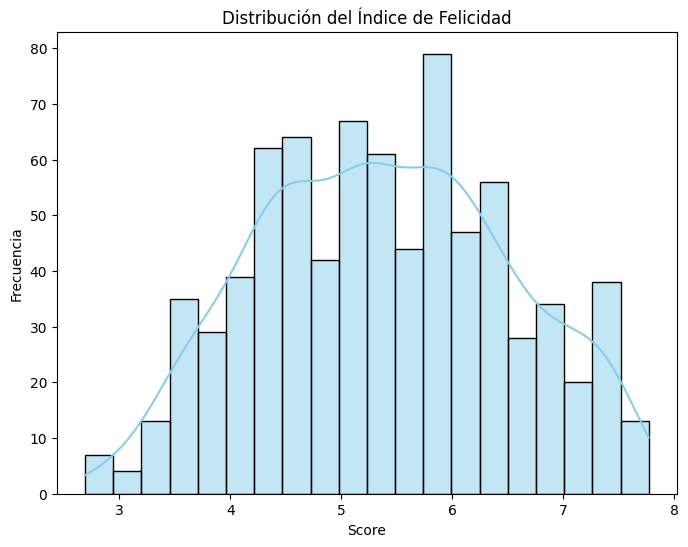

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data_unificado['Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribución del Índice de Felicidad')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.show()

In [64]:
print(data_unificado.columns)


AttributeError: 'Series' object has no attribute 'columns'

In [67]:
plt.figure(figsize=(10, 8))
variables_correlacion = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                         'Freedom to make life choices', 'Perceptions of corruption', 'Generosity', 'Dystopia_Residual']
correlation_matrix = data_unificado[variables_correlacion].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


TypeError: Series.corr() missing 1 required positional argument: 'other'

<Figure size 1000x800 with 0 Axes>

In [68]:
print(type(data_unificado))


<class 'pandas.core.series.Series'>


In [69]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data_unificado, x='Region', y='Score', palette='muted')
plt.xticks(rotation=45)
plt.title('Distribución del Índice de Felicidad por Región')
plt.show()


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1200x800 with 0 Axes>

In [62]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data_unificado, x='Region', y='Score', palette='muted')
plt.xticks(rotation=45)
plt.title('Distribución del Índice de Felicidad por Región')
plt.show()


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1200x800 with 0 Axes>

Columnas innecesarias
Las siguientes columnas no son útiles o pueden agregar redundancia al modelo, por lo que conviene descartarlas:

Country or region: No es útil como predictor y no aporta información numérica.
Region: Al igual que Country or region, es una categorización general y no proporciona una relación cuantitativa clara con el índice de felicidad.
Overall rank: Esta columna es una clasificación derivada del Score, por lo que es redundante.
Standard Error: Solo indica la precisión de las estimaciones y no aporta información sobre el índice de felicidad.
Lower Confidence Interval y Upper Confidence Interval: Representan márgenes de error, y no son necesarios como predictores.
Whisker.high y Whisker.low: Son valores relacionados con intervalos de confianza y no aportan información directa para la predicción del índice de felicidad.


Selección final
Las columnas recomendadas para entrenar el modelo son:

GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Perceptions of corruption
Generosity
Dystopia Residual